In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
confirm_df = pd.read_csv('time_series_covid_19_confirmed.csv')

In [2]:
confirm_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45


In [3]:
confirm_df.nunique()

Province/State     82
Country/Region    187
Lat               256
Long              259
1/22/20            11
                 ... 
5/6/20            235
5/7/20            235
5/8/20            231
5/9/20            236
5/10/20           237
Length: 114, dtype: int64

In [4]:
data = confirm_df.groupby('Country/Region').sum()
#print(data.shape)
#print(data.head())
order = sorted(data['4/20/20'],reverse =True)
print(order[:15])
data_n = data[data['4/20/20']>30000]
#print(data_n.shape)
data_n = data_n.drop(['Lat','Long'],axis =1)
data_n

[784326, 200210, 181228, 155393, 147065, 125856, 90980, 83817, 83505, 47121, 40743, 39983, 37658, 33588, 27944]


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Belgium,0,0,0,0,0,0,0,0,0,0,...,49032,49517,49906,50267,50509,50781,51420,52011,52596,53081
Brazil,0,0,0,0,0,0,0,0,0,0,...,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699
Canada,0,0,0,0,1,1,2,2,2,4,...,56343,57926,60504,61957,63215,64694,66201,67674,68918,70091
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83959,83959,83964,83966,83968,83970,83975,83976,83990,84010
France,0,0,2,3,3,3,4,5,5,5,...,167305,168518,168925,169583,170687,174224,174918,176202,176782,177094
Germany,0,0,0,0,0,1,4,4,4,5,...,164077,164967,165664,166152,167007,168162,169430,170588,171324,171879
Iran,0,0,0,0,0,0,0,0,0,0,...,95646,96448,97424,98647,99970,101650,103135,104691,106220,107603
Italy,0,0,0,0,0,0,0,0,0,2,...,207428,209328,210717,211938,213013,214457,215858,217185,218268,219070
Netherlands,0,0,0,0,0,0,0,0,0,0,...,39989,40434,40769,40968,41286,41518,41973,42292,42581,42826


In [5]:
#檢查遺失值
for column in data_n:
    print(data_n[column].isna().sum(),end = ',')

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
Country = data_n.index
first_day = []
for i in range(len(Country)):
    for j in range(len(data_n.columns)):
        if data_n.iloc[i,j] !=0:
            first_day.append(j) #column 的索引為j的時候，是該國第一天開始有確診病例
            break
print(first_day)            

[13, 35, 4, 0, 2, 5, 28, 9, 36, 9, 10, 49, 0, 9]


In [7]:
col = [i for i in range(len(data_n.columns))]

In [8]:
new_data = []
for index,item in enumerate(Country):
    new_data.append([])
    for j in range(first_day[index],len(data_n.columns)):
        new_data[index].append(data_n.iloc[index,j])        

In [9]:
new_data_df = pd.DataFrame(new_data,index=Country,columns =col )
new_data_df

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
Country/Region,,,,,,,,,,,,,,,,,,,,,
Belgium,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,1,1,1,2,2,2,2,4,4,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,1,1,2,2,2,4,4,4,4,4,...,63215.0,64694.0,66201.0,67674.0,68918.0,70091.0,NaN,NaN,NaN,NaN
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83959.0,83959.0,83964.0,83966.0,83968.0,83970.0,83975.0,83976.0,83990.0,84010.0
France,2,3,3,3,4,5,5,5,6,6,...,168925.0,169583.0,170687.0,174224.0,174918.0,176202.0,176782.0,177094.0,NaN,NaN
Germany,1,4,4,4,5,8,10,12,12,12,...,168162.0,169430.0,170588.0,171324.0,171879.0,NaN,NaN,NaN,NaN,NaN
Iran,2,5,18,28,43,61,95,139,245,388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Italy,2,2,2,2,2,2,2,3,3,3,...,219070.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Netherlands,1,1,6,10,18,24,38,82,128,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


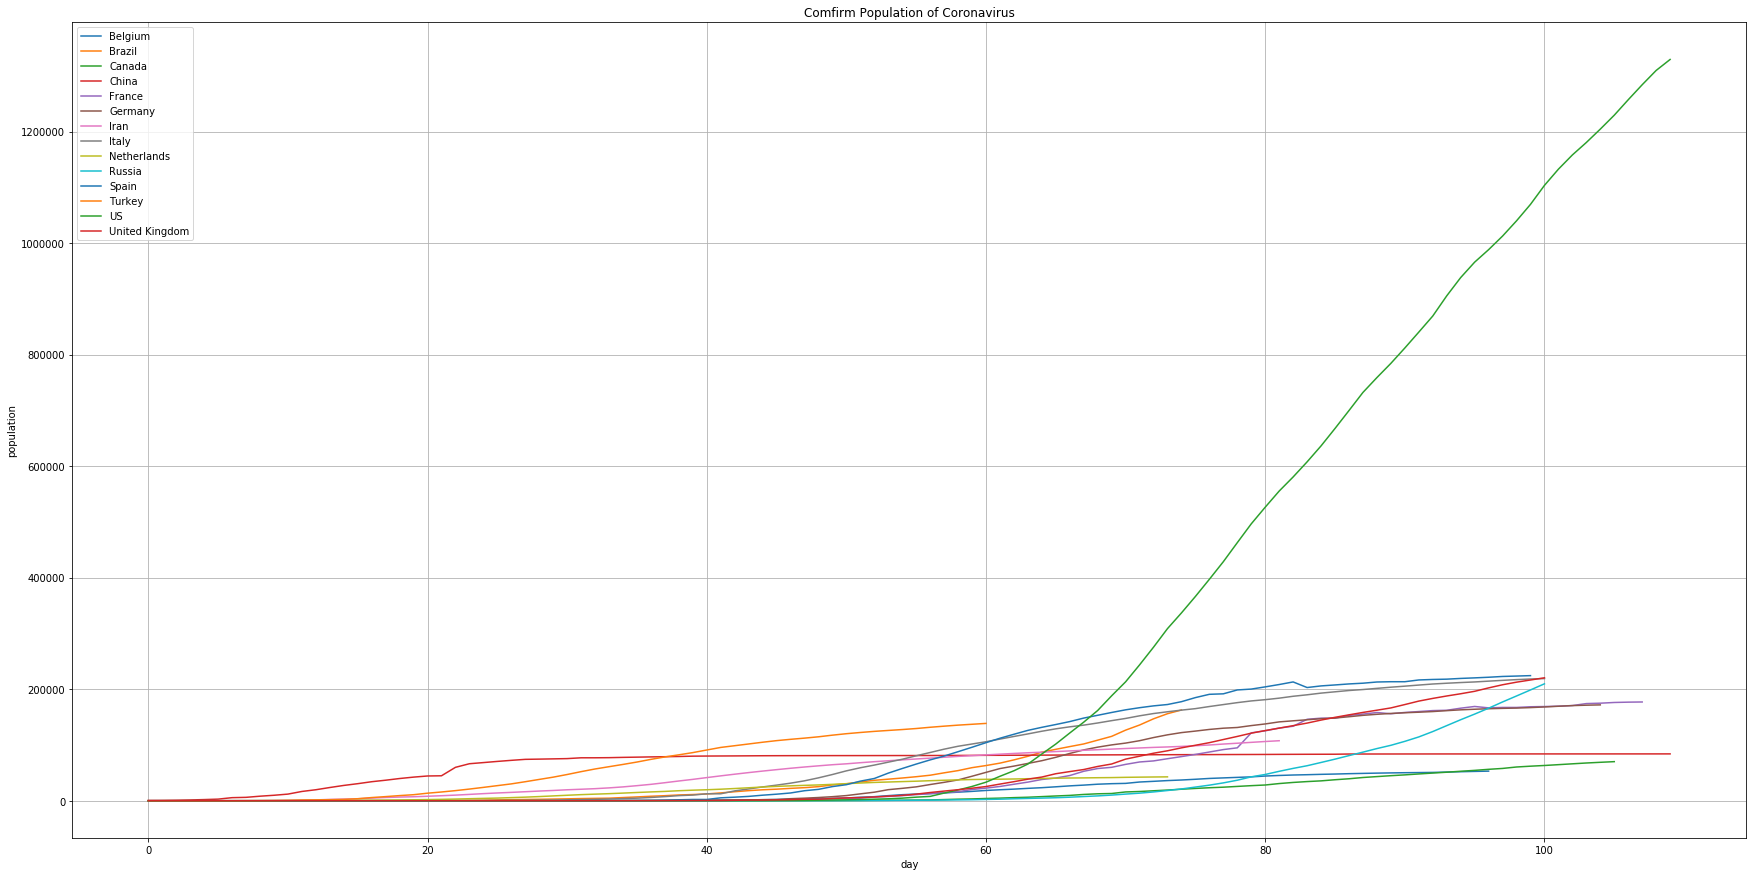

In [10]:
plt.figure(figsize = (30,15))
plt.title('Comfirm Population of Coronavirus')
plt.xlabel('day')
plt.ylabel('population')
plt.grid()
for index,name in enumerate(new_data_df.index):
    plt.plot(new_data_df.loc[name])
    plt.legend()
    
plt.show()

In [11]:
compare_list = ['Iran','China','Turkey']
compare = new_data_df.loc[compare_list,:]
compare

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,2,5,18,28,43,61,95,139,245,388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83959.0,83959.0,83964.0,83966.0,83968.0,83970.0,83975.0,83976.0,83990.0,84010.0
Turkey,1,1,5,5,6,18,47,98,192,359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


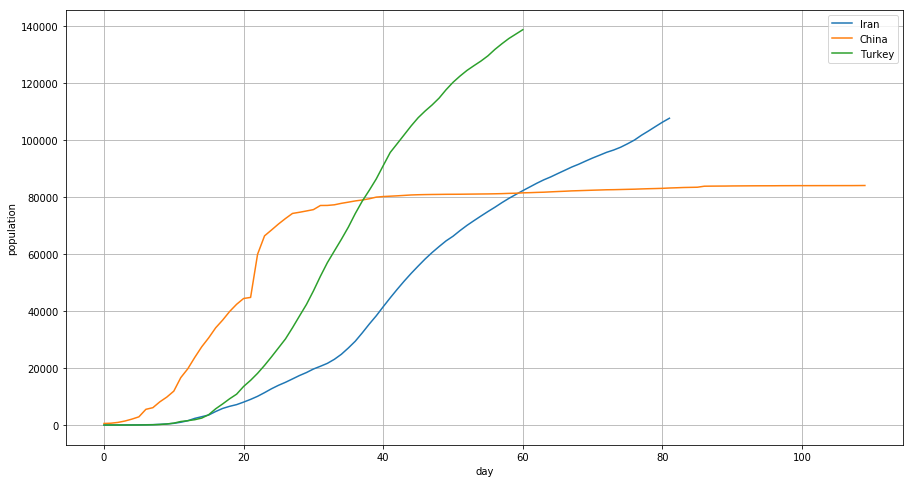

In [12]:
plt.figure(figsize = (15,8))
plt.xlabel('day')
plt.ylabel('population')
plt.grid()
for i in range(len(compare.index)):
    plt.plot(compare.iloc[i])
    plt.legend()
plt.show()